# Setup

## Colab

In [1]:
# Mount the drive and move to dir
from google.colab import drive
drive.mount("/content/drive", force_remount = False)
%cd /content/drive/MyDrive/Coding/spread-res/runscr/

Mounted at /content/drive
/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [2]:
# Import importlib to reload modules and sys and os to add the path for other import
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# Import the model architecture
from classes.models import BertGridNew

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertGridNew)

# Import the model and funcs required from utils
from classes.models.BertGridNew import BertGridNew
from utils.inferutil import infer_full, infer_one
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

device = cuda/mps:0 (env-specific), threads = 1 to inf (env-specific), seed = 0 to inf, data_dir = ../data, rows = 100, cols = 100, tokens = 32, save_dir = ../models/

In [3]:
# Setup the config
input_config = {
    # Environment and Model Info
    "env": "colab",
    "approach": "bert",
    "model_name": "BertGridNew",
    "model_base": "bert-base-cased",
    "data_ds": "50",
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 12,
    "lr": 1e-3,
    "mu": 0.25,
    "epochs": 100,
    "patience": 2,
    "save_int": 20,
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

Processing files: 100%|██████████| 40/40 [00:09<00:00,  4.14it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 4691.62it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 4149.49it/s]



5(P) = 5(G) + 0(E)

FINAL CONFIG:
{
  "env": "colab",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 10,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertGridNew",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "50",
  "data_dir": "../data",
  "train_dir": "../data/50_train",
  "val_dir": "../data/50_val",
  "test_dir": "../data/50_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 12,
  "lr": 0.001,
  "mu": 0.25,
  "epochs": 100,
  "patience": 2,
  "sav

# Model Training

In [4]:
# Create and observe the model
untrained_model = BertGridNew(config).to(DEVICE)
print(untrained_model)

BertGridNew(
  (bertModel_cell): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)


## Training Metrics

1. GPU Model: 521 mb
2. GPU Training: 31.2 gb

3. Per Epoch Train Time: 2s
4. Per Epoch Val Time: \<1s


In [5]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 1.3451e+00, Val Loss: 1.5545e+00


Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 1.1983e+00, Val Loss: 1.4339e+00


Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 1.2824e+00, Val Loss: 1.3498e+00


Epoch 3


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


Train Loss: 1.1114e+00, Val Loss: 1.2873e+00


Epoch 4


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 1.0745e+00, Val Loss: 1.2405e+00


Epoch 5


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.26it/s]


Train Loss: 1.0440e+00, Val Loss: 1.2075e+00


Epoch 6


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Train Loss: 1.2937e+00, Val Loss: 1.1759e+00


Epoch 7


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 1.0584e+00, Val Loss: 1.1413e+00


Epoch 8


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 1.1365e+00, Val Loss: 1.1153e+00


Epoch 9


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 1.0764e+00, Val Loss: 1.0856e+00


Epoch 10


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 1.0642e+00, Val Loss: 1.0514e+00


Epoch 11


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.24it/s]


Train Loss: 9.6573e-01, Val Loss: 1.0251e+00


Epoch 12


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.21it/s]


Train Loss: 9.5946e-01, Val Loss: 9.9825e-01


Epoch 13


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 8.6157e-01, Val Loss: 9.7512e-01


Epoch 14


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.07it/s]


Train Loss: 9.2824e-01, Val Loss: 9.4840e-01


Epoch 15


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Train Loss: 8.8414e-01, Val Loss: 9.1136e-01


Epoch 16


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Train Loss: 9.5900e-01, Val Loss: 8.8707e-01


Epoch 17


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 7.9495e-01, Val Loss: 8.5913e-01


Epoch 18


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 7.5982e-01, Val Loss: 8.2929e-01


Epoch 19


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 7.4067e-01, Val Loss: 8.0389e-01

Model Saved

Epoch 20


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 7.5014e-01, Val Loss: 7.7504e-01


Epoch 21


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Train Loss: 7.1879e-01, Val Loss: 7.4687e-01


Epoch 22


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 6.7317e-01, Val Loss: 7.2223e-01


Epoch 23


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 7.1411e-01, Val Loss: 6.9779e-01


Epoch 24


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 6.5262e-01, Val Loss: 6.7363e-01


Epoch 25


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 6.3381e-01, Val Loss: 6.5179e-01


Epoch 26


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 7.3096e-01, Val Loss: 6.3486e-01


Epoch 27


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.08it/s]


Train Loss: 7.2379e-01, Val Loss: 6.2044e-01


Epoch 28


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 5.7063e-01, Val Loss: 6.0366e-01


Epoch 29


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.18it/s]


Train Loss: 5.3568e-01, Val Loss: 5.8891e-01


Epoch 30


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.19it/s]


Train Loss: 5.8652e-01, Val Loss: 5.7534e-01


Epoch 31


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 5.1855e-01, Val Loss: 5.6296e-01


Epoch 32


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 5.5294e-01, Val Loss: 5.5008e-01


Epoch 33


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 6.0163e-01, Val Loss: 5.3979e-01


Epoch 34


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.39it/s]


Train Loss: 4.7340e-01, Val Loss: 5.2875e-01


Epoch 35


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 4.7634e-01, Val Loss: 5.1764e-01


Epoch 36


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 5.1841e-01, Val Loss: 5.0704e-01


Epoch 37


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.29it/s]


Train Loss: 5.4111e-01, Val Loss: 4.9864e-01


Epoch 38


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.7108e-01, Val Loss: 4.8977e-01


Epoch 39


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.17it/s]


Train Loss: 4.8270e-01, Val Loss: 4.8175e-01

Model Saved

Epoch 40


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 4.8679e-01, Val Loss: 4.7412e-01


Epoch 41


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 4.1794e-01, Val Loss: 4.6593e-01


Epoch 42


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 4.9411e-01, Val Loss: 4.5958e-01


Epoch 43


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 4.3837e-01, Val Loss: 4.5212e-01


Epoch 44


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 4.5082e-01, Val Loss: 4.4470e-01


Epoch 45


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.1387e-01, Val Loss: 4.3901e-01


Epoch 46


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.45it/s]


Train Loss: 4.1726e-01, Val Loss: 4.3295e-01


Epoch 47


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.9619e-01, Val Loss: 4.2630e-01


Epoch 48


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 4.7634e-01, Val Loss: 4.2153e-01


Epoch 49


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 4.2845e-01, Val Loss: 4.1641e-01


Epoch 50


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.7498e-01, Val Loss: 4.1078e-01


Epoch 51


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 4.2478e-01, Val Loss: 4.0543e-01


Epoch 52


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 4.2503e-01, Val Loss: 3.9986e-01


Epoch 53


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.8281e-01, Val Loss: 3.9497e-01


Epoch 54


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 3.6996e-01, Val Loss: 3.9027e-01


Epoch 55


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.4939e-01, Val Loss: 3.8530e-01


Epoch 56


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 4.3552e-01, Val Loss: 3.8209e-01


Epoch 57


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.6108e-01, Val Loss: 3.7662e-01


Epoch 58


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.3209e-01, Val Loss: 3.7333e-01


Epoch 59


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.7088e-01, Val Loss: 3.6949e-01

Model Saved

Epoch 60


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.3608e-01, Val Loss: 3.6700e-01


Epoch 61


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.4393e-01, Val Loss: 3.6345e-01


Epoch 62


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.4639e-01, Val Loss: 3.5957e-01


Epoch 63


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.6306e-01, Val Loss: 3.5650e-01


Epoch 64


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.98it/s]


Train Loss: 3.1174e-01, Val Loss: 3.5346e-01


Epoch 65


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.2962e-01, Val Loss: 3.5040e-01


Epoch 66


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.1823e-01, Val Loss: 3.4771e-01


Epoch 67


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.1029e-01, Val Loss: 3.4612e-01


Epoch 68


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.4002e-01, Val Loss: 3.4408e-01


Epoch 69


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.1048e-01, Val Loss: 3.4118e-01


Epoch 70


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


Train Loss: 3.1510e-01, Val Loss: 3.3724e-01


Epoch 71


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 3.2105e-01, Val Loss: 3.3408e-01


Epoch 72


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.1784e-01, Val Loss: 3.3132e-01


Epoch 73


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.0664e-01, Val Loss: 3.2822e-01


Epoch 74


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 3.9836e-01, Val Loss: 3.2581e-01


Epoch 75


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.9350e-01, Val Loss: 3.2297e-01


Epoch 76


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.1009e-01, Val Loss: 3.2082e-01


Epoch 77


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.8287e-01, Val Loss: 3.1768e-01


Epoch 78


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.9194e-01, Val Loss: 3.1497e-01


Epoch 79


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.0427e-01, Val Loss: 3.1190e-01

Model Saved

Epoch 80


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.7816e-01, Val Loss: 3.0876e-01


Epoch 81


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.6453e-01, Val Loss: 3.0697e-01


Epoch 82


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 3.0142e-01, Val Loss: 3.0442e-01


Epoch 83


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 3.1433e-01, Val Loss: 3.0253e-01


Epoch 84


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.03it/s]


Train Loss: 2.6742e-01, Val Loss: 3.0005e-01


Epoch 85


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.7945e-01, Val Loss: 2.9689e-01


Epoch 86


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]


Train Loss: 2.9771e-01, Val Loss: 2.9488e-01


Epoch 87


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 3.1349e-01, Val Loss: 2.9228e-01


Epoch 88


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 2.6838e-01, Val Loss: 2.9057e-01


Epoch 89


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.7376e-01, Val Loss: 2.8837e-01


Epoch 90


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.05it/s]


Train Loss: 2.5976e-01, Val Loss: 2.8533e-01


Epoch 91


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.6921e-01, Val Loss: 2.8404e-01


Epoch 92


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.4156e-01, Val Loss: 2.8280e-01


Epoch 93


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 2.7388e-01, Val Loss: 2.8161e-01


Epoch 94


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  5.99it/s]


Train Loss: 3.1642e-01, Val Loss: 2.8060e-01


Epoch 95


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.6775e-01, Val Loss: 2.7788e-01


Epoch 96


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]


Train Loss: 2.5578e-01, Val Loss: 2.7603e-01


Epoch 97


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.06it/s]


Train Loss: 3.1224e-01, Val Loss: 2.7410e-01


Epoch 98


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


Train Loss: 2.4132e-01, Val Loss: 2.7260e-01


Epoch 99


Validation Processing: 100%|██████████| 1/1 [00:00<00:00,  6.01it/s]


Train Loss: 2.8642e-01, Val Loss: 2.7120e-01

Model Saved


TRAINING DONE at epoch 99, best epoch 99
Train Loss = 0.2864178530871868, Perplexity = 1.0000023868182908
Val Loss = 0.2711993455886841, Perplexity = 1.0000022599971004


# Evaluation

In [10]:
# Params
loc = 0
thresh = 0.89
infer_batch_size = batch_size

## Single Example


Filename: ../data/50_train/5%20ORD-013745%20CTD%20Chemical-gene%20interactions.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(2,2): 0.885286 | (2,3): 0.885834 | (2,1): 0.887179 | (2,4): 0.889931 | (2,5): 0.890671 | (2,0): 0.891362 | (2,6): 0.891442 | (0,0): 0.892896

NB to B ratio: Predicted = 9984:16 | Actual = 9992:8
Accuracy: 99.84% | Precision: 25.00% | Recall: 50.00% | F1-Score: 0.33



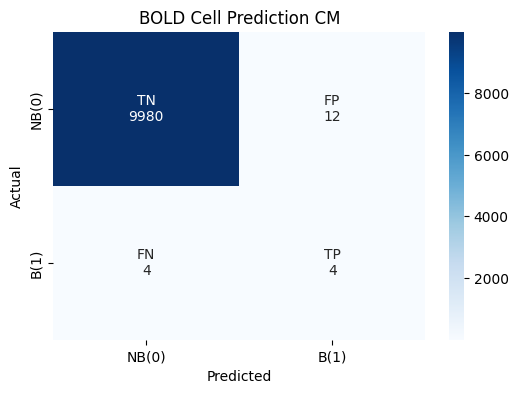


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,5,6
0,1,0,0,0,0,0
2,1,0,0,0,1,1
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,1,0,0
7,0,1,0,1,0,0
8,0,1,1,0,0,0
9,0,1,1,0,0,0
10,0,1,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6
0,1,0,0,0,0,0,0
2,1,1,1,1,1,1,1


In [11]:
# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_val/LMDI_Combined.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
No bold cells in the actual data.

NB to B ratio: Predicted = 9993:7 | Actual = 10000:0
Accuracy: 99.93% | Precision: 0.00% | Recall: 0.00% | F1-Score: 0.00



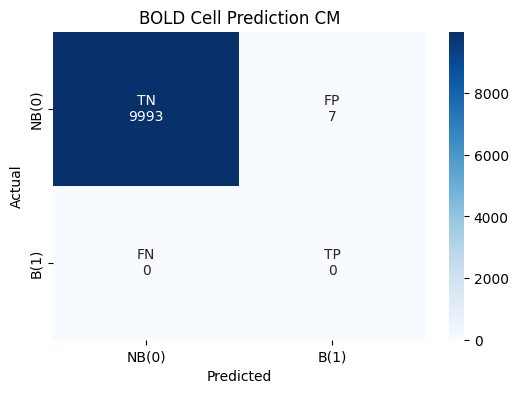


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3
0,1,0,1
4,0,1,0
6,0,0,1
9,1,0,1
11,0,0,1



--- Actual Grid (1 = Bold, 0 = Not Bold) ---
No bold cells in actual data.


In [12]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)


Filename: ../data/50_test/retrospective-review-plan-report-20150317.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(0,0): 0.065899 | (0,9): 0.726954 | (0,11): 0.873043 | (0,10): 0.887187 | (0,6): 0.888388 | (0,7): 0.888991 | (0,8): 0.890188 | (0,2): 0.890586 | (0,3): 0.890743 | (0,1): 0.891688 | (0,5): 0.892949 | (0,4): 0.893001

NB to B ratio: Predicted = 9959:41 | Actual = 9988:12
Accuracy: 99.59% | Precision: 14.63% | Recall: 50.00% | F1-Score: 0.23



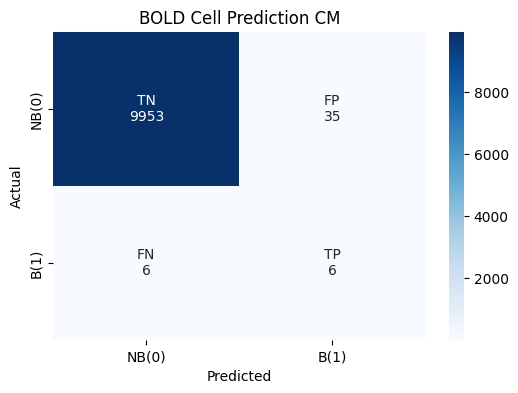


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,7,8,9,11
0,0,1,1,1,1,1,0,1,0,0
1,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,1,0,1,0,0,0
4,1,1,1,0,0,0,0,0,0,1
5,1,1,1,1,0,0,0,0,0,1
6,1,1,1,1,0,0,0,0,0,0
7,1,1,1,1,0,0,0,0,0,0
8,1,1,1,1,1,0,0,0,0,0
9,0,1,1,0,1,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,1,1,1,1,1,1,1,1,1,1,1


In [13]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
    disp_sig=True,
)

## All Examples

Batch Inference: 100%|██████████| 4/4 [00:00<00:00,  4.21it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 399488:512 | Actual = 399199:801
Accuracy: 99.79% | Precision: 45.02% | Recall: 28.83% | F1-Score: 0.33



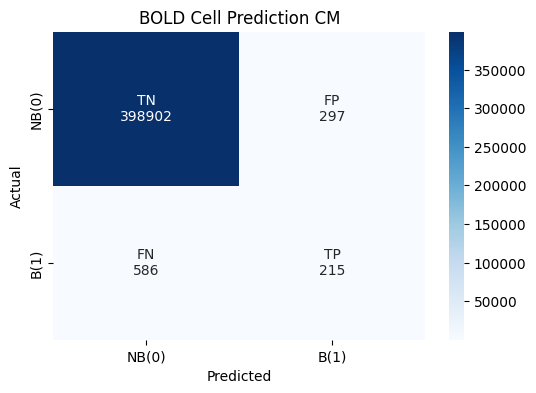

In [17]:
# Infer across all examples of train_loader
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  8.46it/s]



--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49910:90 | Actual = 49846:154
Accuracy: 99.72% | Precision: 57.78% | Recall: 33.77% | F1-Score: 0.43



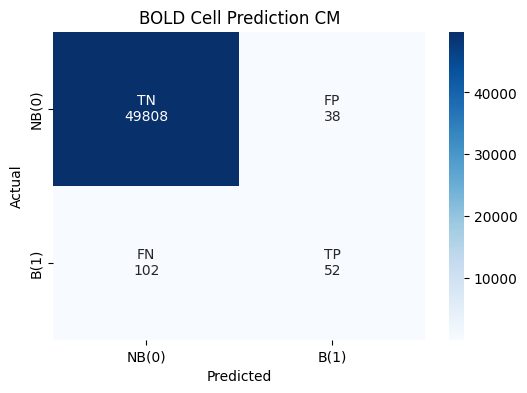

In [18]:
# Infer across all examples of val_loader
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49854:146 | Actual = 49801:199
Accuracy: 99.51% | Precision: 33.56% | Recall: 24.62% | F1-Score: 0.28



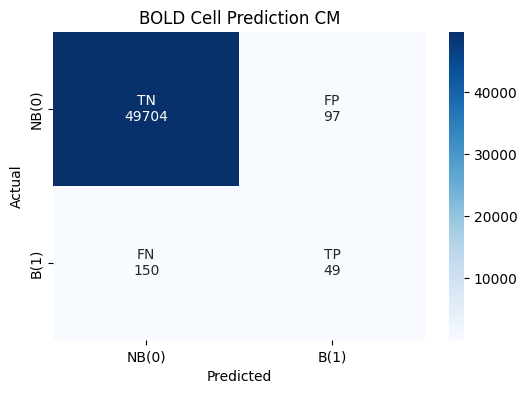

In [19]:
# Infer across all examples of test_loader
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=infer_batch_size,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)